# 1. Regressão Linear
## 1.1. Univariada

Existem diversos problemas na natureza para os quais procura-se obter valores de saída dado um conjunto de dados de entrada. Suponha o problema de predizer os valores de imóveis de uma determinada cidade, conforme apresentado na Figura 1, em que podemos observer vários pontos que representam diferentes imóveis, cada qual com seu preço de acordo com o seu tamanho. 

Em problemas de **regressão**, objetiva-se estimar valores de saída de acordo com um conjunto de valores de entrada. Desta forma, considerando o problema anterior, a ideia consiste em estimar o preço de uma casa de acordo com o seu tamanho, isto é, gostaríamos de encontrar uma **linha reta** que melhor se adequa ao conjunto de pontos na Figura 1.

In [77]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from matplotlib import pyplot

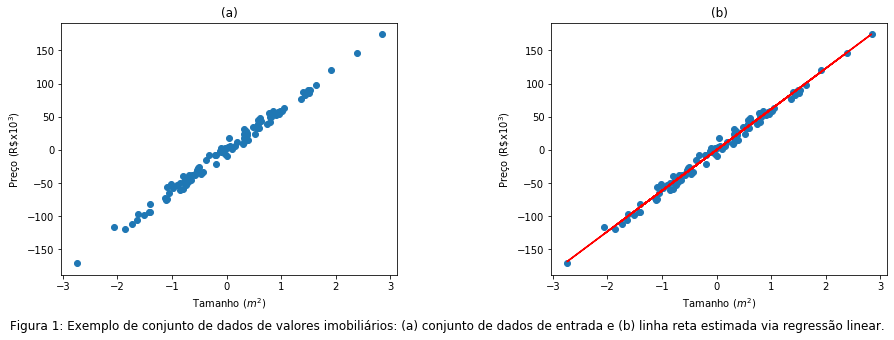

In [96]:
# gerando um conjunto de pontos aleatórios para um problema de regressão linear ***
x, y = make_regression(n_samples=100, n_features=1, noise=5.7)

# apresenta o conjunto de dados criado no passo anterior ***
fig = pyplot.figure(figsize=(15,7))

pyplot.subplot(1, 2, 1)
pyplot.scatter(x,y)
pyplot.xlabel("Tamanho ($m^2$)")
pyplot.ylabel("Preço (R\$x$10^3$)")
pyplot.title("(a)")

# executando regressor linear
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) #criando partições
model = LinearRegression()  
model.fit(x_train, y_train) # treinando o algoritmo
y_pred = model.predict(x_test) #avaliando o modelo

pyplot.subplot(1, 2, 2)
pyplot.scatter(x,y)
pyplot.plot(x_train, model.predict(x_train), color = 'red')
pyplot.xlabel("Tamanho ($m^2$)")
pyplot.ylabel("Preço (R\$x$10^3$)")
pyplot.title("(b)")

fig.tight_layout(pad=10)
fig.suptitle("Figura 1: Exemplo de conjunto de dados de valores imobiliários: (a) conjunto de dados de entrada e (b) linha reta estimada via regressão linear.", y=0.18)
pyplot.show()

Seja um conjunto de dados ${\cal D}=\{(x_1,y_1),(x_2,y_2),\ldots,(x_m,y_m)\}$ tal que $x_i\in\Re$ denota o conjunto dos dados de **entrada** (isto é, o tamanho da casa) e $y_i\in\Re$ representa o seu valor. Além disso, seja ${\cal D}_{tr}\subset {\cal D}$ o chamado **conjunto de treinamento** e ${\cal D}_{ts}\subset {\cal D}\backslash{\cal D}_{tr}$ o **conjunto de teste**. Usualmente, técnicas de aprendizado de máquina são avaliadas em conjuntos de treinamento e teste disjuntos, ou seja, temos que ${\cal D}_{tr}$ e ${\cal D}_{ts}$ são denominados **partições** do conjunto original ${\cal D}$.